In [2]:
from xgboost import XGBClassifier
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('./modeldata1.csv',encoding="gbk")
data['target'] = data['是否逾期'].map({
    "是":1,
    "否":0
})
data = data.drop(['是否逾期'],axis=1)
data.head()

,申请时段,grade,closed_accounts,open_accounts,enquiry_alert,人脸相似度,电话使用时长,年龄,分区,信用卡额度使用率,...,历史近两年逾期最大天数,ULC33S,近三个月逾期天数,G207O,dsr_before,身份证号首字母,历史申请贷款查询数,开户成功率,total_monthly_obligation,target
0,21点,HH,14,5,57,0.34,Missing,35,元朗,0.98,...,18,220605,18,12357,73,Z,20,0.75,12702,0
1,22点,HH,1,5,63,0.55,两年以上,33,葵青,1.01,...,0,274346,0,8910,45,Z,6,0.17,9255,0
2,13点,II,29,6,71,0.54,两年以上,46,九龙城,0.65,...,0,309839,0,19507,82,G,30,1.10,19692,0
3,11点,II,20,4,58,0.56,两年以上,27,屯门,0.00,...,8,40806,8,2267,8,Y,27,0.63,2451,0
4,10点,HH,2,5,45,0.50,两年以上,28,屯门,0.98,...,0,240985,0,10775,22,Y,4,1.25,11120,0


In [4]:
import numbers
allFeatures = list(data.columns)
allFeatures.remove('target')

numerical_var = []
for col in allFeatures:
    if len(set(data[col])) == 1:
        print('delete {} from the dataset because it is a constant'.format(col))
        del data[col]
        allFeatures.remove(col)
    else:
        uniq_valid_vals = [i for i in data[col] if i == i]
        uniq_valid_vals = list(set(uniq_valid_vals))
        if len(uniq_valid_vals) >= 6 and isinstance(uniq_valid_vals[0], numbers.Real):
            numerical_var.append(col)

categorical_var = [i for i in allFeatures if i not in numerical_var]
print(numerical_var)
print(categorical_var)

['closed_accounts', 'open_accounts', 'enquiry_alert', '人脸相似度', '年龄', '信用卡额度使用率', '信用卡数', '信用卡平均额度', '贷款数', '贷款平均额度', '平均分期金额', '平均期数', '90天内贷款查询次数', '180天内贷款查询次数', '120天内信用卡查询次数', '365天内信用卡查询次数', '历史近两年逾期最大天数', 'ULC33S', '近三个月逾期天数', 'G207O', 'dsr_before', '历史申请贷款查询数', '开户成功率', 'total_monthly_obligation']
['申请时段', 'grade', '电话使用时长', '分区', '身份证号首字母']


In [5]:
def preprocessing():
    from sklearn.preprocessing import LabelEncoder
    #label = data['target']
    #data = data.drop(['target'],axis=1)
    #特征选择
    #考虑相关性，可以去除几个属性，但因为总体的属性不多，暂不处理
    #特征处理
#     for i in range(len(numerical_var)):
#         data[numerical_var[i]] = MinMaxScaler().fit_transform(data[numerical_var[i]].values.reshape(-1,1)).reshape(1,-1)[0]

    #处理离散值数值化
    for i in range(len(categorical_var)):
        if categorical_var[i] == "申请时段":
            data[categorical_var[i]] = [map_apply(s) for s in data["申请时段"].values]
        elif categorical_var[i] == "grade":
            data[categorical_var[i]] = [map_grade(w) for w in data['grade'].values]
        else:
            print(categorical_var[i])
            data[categorical_var[i]] = LabelEncoder().fit_transform(data[categorical_var[i]])
            #对于labelEncoder的情况下还需要进行归一化处理
            #data[categorical_var[i]] = MinMaxScaler().fit_transform(data[categorical_var[i]].values.reshape(-1,1)).reshape(1,-1)[0]

    return data

def map_apply(s):
    d = dict([("0点",24),("1点",1),("2点",2),("3点",3),("4点",4),("5点",5),("6点",6),("7点",7),("8点",8),("9点",9),("10点",10),("11点",11),
             ("12点",12),("13点",13),("14点",14),("15点",15),("16点",16),("17点",17),("18点",18),("19点",19),("20点",20),("21点",21),
             ("22点",22),("23点",23)])
    return d.get(s,0)
def map_grade(w):
    d = dict([("AA",9),("BB",8),("CC",7),("DD",6),("EE",5),("FF",4),("GG",3),("HH",2),("II",1)])
    return d.get(w,0)

In [6]:

X = preprocessing()
Y = X['target']
X = X.drop(['target'],axis=1)
print(X.shape)
print(Y.shape)

电话使用时长
分区
身份证号首字母
(1563, 29)
(1563,)


In [7]:
X

,申请时段,grade,closed_accounts,open_accounts,enquiry_alert,人脸相似度,电话使用时长,年龄,分区,信用卡额度使用率,...,365天内信用卡查询次数,历史近两年逾期最大天数,ULC33S,近三个月逾期天数,G207O,dsr_before,身份证号首字母,历史申请贷款查询数,开户成功率,total_monthly_obligation
0,21,2,14,5,57,0.34,0,35,3,0.98,...,4,18,220605,18,12357,73,11,20,0.75,12702
1,22,2,1,5,63,0.55,4,33,14,1.01,...,0,0,274346,0,8910,45,11,6,0.17,9255
2,13,1,29,6,71,0.54,4,46,2,0.65,...,2,0,309839,0,19507,82,3,30,1.10,19692
3,11,1,20,4,58,0.56,4,27,7,0.00,...,0,8,40806,8,2267,8,10,27,0.63,2451
4,10,2,2,5,45,0.50,4,28,7,0.98,...,0,0,240985,0,10775,22,10,4,1.25,11120
5,11,1,13,12,75,0.68,4,45,15,0.59,...,1,3,275144,0,10523,100,5,28,0.71,10707
6,13,1,7,6,92,0.47,5,26,16,0.00,...,0,64,246529,0,14406,63,10,48,0.17,14590
7,14,4,2,0,22,0.76,1,26,16,0.74,...,0,0,141355,0,6578,32,10,21,0.10,0
8,21,2,11,7,96,0.60,0,33,4,0.47,...,0,0,599472,0,11093,45,11,9,0.33,11438
9,24,1,5,4,61,0.57,1,38,4,0.99,...,13,1,72607,1,4088,29,7,31,0.29,4272


In [8]:
X.columns

Index(['申请时段', 'grade', 'closed_accounts', 'open_accounts', 'enquiry_alert',
       '人脸相似度', '电话使用时长', '年龄', '分区', '信用卡额度使用率', '信用卡数', '信用卡平均额度', '贷款数',
       '贷款平均额度', '平均分期金额', '平均期数', '90天内贷款查询次数', '180天内贷款查询次数', '120天内信用卡查询次数',
       '365天内信用卡查询次数', '历史近两年逾期最大天数', 'ULC33S', '近三个月逾期天数', 'G207O',
       'dsr_before', '身份证号首字母', '历史申请贷款查询数', '开户成功率',
       'total_monthly_obligation'],
      dtype='object')

0.677799453765 143


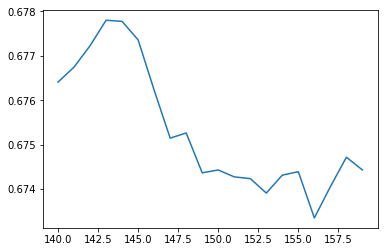

In [11]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
start = 140
stop = 160
steps = 1
n_estimators_range = range(start,stop,steps)
scores = []
for i in n_estimators_range:
    clf = XGBClassifier(n_estimators=i, nthread=-1,random_state=0, scale_pos_weight=9)
    rs = cross_val_score(clf,X,Y,cv=3,scoring="roc_auc").mean()
    scores.append(rs)
plt.plot(n_estimators_range,scores)
print(max(scores), start + steps * scores.index(max(scores)))
plt.show()


0.695031863701 157


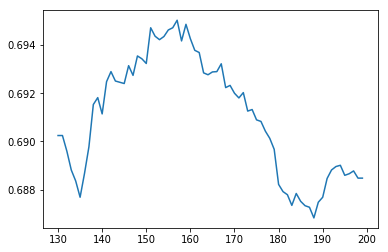

In [12]:
start = 130
stop = 200
steps = 1
n_estimators_range = range(start,stop,steps)
scores = []
for i in n_estimators_range:
    clf = XGBClassifier(n_estimators=i, nthread=-1,random_state=0)
    rs = cross_val_score(clf,X,Y,cv=3,scoring="roc_auc").mean()
    scores.append(rs)
plt.plot(n_estimators_range,scores)
print(max(scores), start + steps * scores.index(max(scores)))
plt.show()

In [13]:
clf = XGBClassifier(n_estimators=157, nthread=-1, random_state=0)
rs = cross_val_score(clf, X, Y, cv=3, scoring="roc_auc").mean()
rs

0.69503186370139147

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
clf = XGBClassifier(n_estimators=157, nthread=-1, random_state=0)
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.3,random_state=0)
clf.fit(Xtrain,Ytrain)
clf.score(Xtest,Ytest)
print(roc_auc_score(Ytest,clf.predict_proba(Xtest)[:,1]))
print(roc_curve(Ytest,clf.predict(Xtest)))

0.681097852029
(array([ 0.        ,  0.00477327,  1.        ]), array([ 0.,  0.,  1.]), array([2, 1, 0]))
